# Four Problems for Week 05's Assignment 

Problem 1:

    a. take a given nfa called nfa1
    
    b. convert it to dfa1 
    
    c. reverse nfa1 by hand obtaining rnfa1
    
    d. inspect and conclude (listing six paths) that rnfa1 is indeed a reverse of nfa1

Problem 2:

    a. learn about a few DFA utilities such as totalize_dfa and dotObj_dfa_w_bh
    
    b. extract an RE by inspecting nfa1 and write it down as RE1_hand
    
    c. reverse RE1_hand by inspection, writing the result down as Rev_RE1_hand
    
    d. Understand the function del_gnfa_states via its help command
    

Problem 3:

    a. obtain a GNFA for rnfa1, calling it grnfa1
    
    b. apply two elimination orders for states on grnfa1
    
    c. obtain Rev_RE1 and Rev_RE2
    
    d. check that Rev_RE1 and Rev_RE2 and Rev_RE1_hand are all isomorphic
    

Problem 4:

    a. print the NFA for Rev_RE2 and answer the stated questions.
    
    b. print the NFA for Rev_RE1_hand and answer the stated questions. 

# Imports 


In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
  
  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty',
                   '../Jove',      '../Jove/jove']

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.Def_NFA2RE import *
from jove.Def_RE2NFA import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 23.90 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_e

## Problem 1: 

In [2]:
# Given NFA

nfa1 = md2mc('''NFA
I1 : '' -> B
I1 : a  -> I2

I2 : c  -> F3
I2 : b  -> B

B : s  -> B
B : d  -> F4
B : f  -> F3


''')


Generating LALR tables


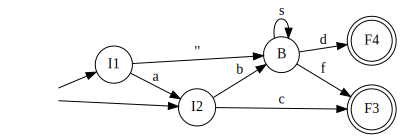

In [3]:
dotObj_nfa(nfa1)

## 1.1: Convert the given NFA to a DFA by hand.

Use as many bullets as necessary to clearly show your work:

* Initially we enter states I1 and I2 giving { I1, I2 }

* After performing E-Closure, we are left with { I1, I2, B }. So, we will have the initial state, I1_I2_B in the DFA.

* Applying 'a' to { I1, I2, B }, we get { I2 }. After performing E-Closure, we still have { I2 }. So, the DFA must have a state I2 which I1_I2_B enters after receiving an 'a'.

* Applying 'b' to { I1, I2, B }, we are left with { B }. After performing E-Closure, we still have { B } So, the DFA must have a state B which I1_I2_B enters after receiving a 'b'. 

* Applying 'c' to { I1, I2, B }, we are left with { F3 }. E-Closure does not add any more states, so the DFA must have a state F3 which I1_I2_B enters after receiving a 'c'.

* Applying 's' to { I1, I2, B }, we are left with { B }. E-Closure does not add any more states, so the DFA state I1_I2_B must enter the previously defined DFA state B after receiving an 's'.

* Applying 'f' to { I1, I2, B }, we are left with { F3 }. E-Closure does not add any more states, so the DFA state I1_I2_B must enter the previously defined DFA state F3 after receiving an 'f'.

* Applying 'd' to { I1, I2, B }, we are left with { F4 }. E-Closure does not add any more states, so the DFA state I1_I2_B must enter the DFA state F4 after receiving a 'd'.

* After exhausting { I1, I2, B }, we moved on to the state set { I2 }.

* Applying 'c' to  { I2 } gets us to state F3 and applying 'b' gets us to state { B }. So, the DFA must have a 'c' connection from I2 to F3 and a 'b' connection from I2 to B.

* After exhausting { I2 }, we moved on to the state set { B }.

* Applying 's' to { B } gave us { B }, 'f' gave us { F3 }, and 'd' gave us { F4 }. So, the DFA must have an 's' connection from B back to B, an 'f' connection from B to F3, and a 'd' connection from B to F4.

* Note: An 'S' was added to DFA state I2 so it would not be marked as an initial state.

In [4]:
# DFA of nfa1

dfa1 = md2mc('''DFA

I1_I2_B : a -> SI2
I1_I2_B : b -> B
I1_I2_B : c -> F3
I1_I2_B : s -> B
I1_I2_B : f -> F3
I1_I2_B : d -> F4

SI2 : b -> B
SI2 : c -> F3

B : s -> B
B : f -> F3
B : d -> F4

''')

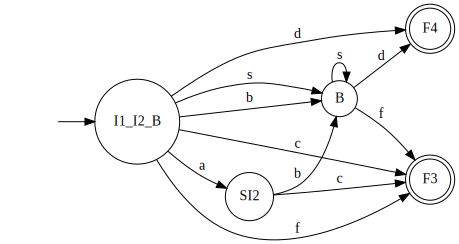

In [5]:
dotObj_dfa(dfa1)

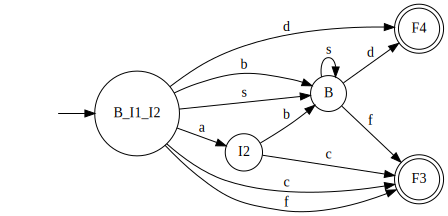

In [6]:
# Verification
nfa2dfaTest1 = nfa2dfa(nfa1)
dotObj_dfa(nfa2dfaTest1)

As shown above, we were successful in converting the NFA to a DFA. We did have to make one change after running the nfa2dfa conversion function, but it was just a typo where we wrote 'F3' where we should have written 'F4'.

## 1.2: Reverse nfa1 by hand and name the states in this manner:

1) Change F3 to I3

2) Change F4 to I4

3) Change I1 and I2 to F1 and F2

4) Now, reverse the transitions of nfa1, obtaining "rnfa1" below
 

In [7]:
# There is no Jove function to reverse automatically - do it by hand!
rnfa1 = md2mc('''
NFA

!! F1 : '' -> B
B : '' -> F1

!! F1 : a  -> F2
F2 : a -> F1

!!F2 : c  -> I3
I3 : c -> F2

!!F2 : b  -> B
B : b -> F2

!!B : s  -> B
B : s -> B

!!B : d  -> I4
I4 : d -> B

!!B : f  -> I3
I3 : f -> B

''')

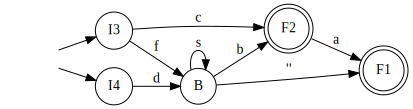

In [8]:
dotObj_nfa(rnfa1)

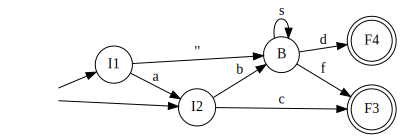

In [9]:
dotObj_nfa(nfa1)

## 1.3: Inspect and conclude that rnfa1 is truly the reverse of nfa1
### List the first six strings in numeric order and check that they have been correctly reversed. State the string in the original machine and explain (by specifying a path as a sequence of states) that this string is present in the reversed machine also.

1. c, the reverse is c. The path is I3 to F2.

2. d, the reverse is d thanks to the E-Closure between 'B' and 'F1'. The path is I4 to B which goes to F1 on E-closure.

3. f, the reverse is f for the same reason as d. The path is I3 to B which goes to F1 on E-Closure.

4. ac, the reverse string ca exists in the reversed NFA. The path is I3 to F2 to F1.

5. sd, the reverse string ds exists in the reversed NFA. The path is I4 to B to B which goes to F1 on E-Closure.

6. sf, the reverse string fs exists in the reversed NFA. I3 to B to B which goes to F1 on E-Closure.

 
 

# Problem 2: Extraction of RE by Inspection and other things before it


## 2.1: Totalize dfa1 to obtain the totalized machine, then explain totalize_dfa in a few sentences below, by looking at the Delta before and After

In [10]:
tdfa1 = totalize_dfa(dfa1)

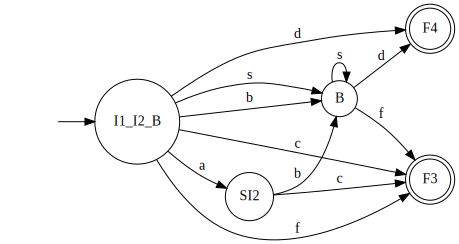

In [11]:
dotObj_dfa(tdfa1)

In [12]:
iso_dfa(nfa2dfaTest1, tdfa1)

True

### Your explanation of totalize_dfa:

* Before this problem, we had attempted to do iso_dfa as shown below on the non-totalized DFA and the NFA conversion given by the nfa2dfa function. However, we ran into some issues. We concluded that our hand-drawn DFA conversion must have issues due to its loose ends. For example, there is no direction on what to do on state B if an 'a' is given.

* Based on the above functioning version of the iso_dfa function (when given the totalized version of our by-hand DFA conversion), it seems that the totalize_dfa function must remove these loose ends by adding a black-hole state which is not displayed when run through dotObj_dfa. This black-hole state would connect all loose ends (B with 'a', SI2 with 'a' or 's', etc.) from every state to itself.

##  Compare the dfa with and without the black hole:

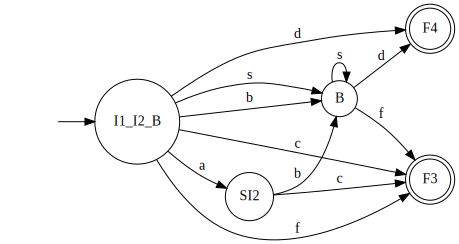

In [13]:
dotObj_dfa(tdfa1)

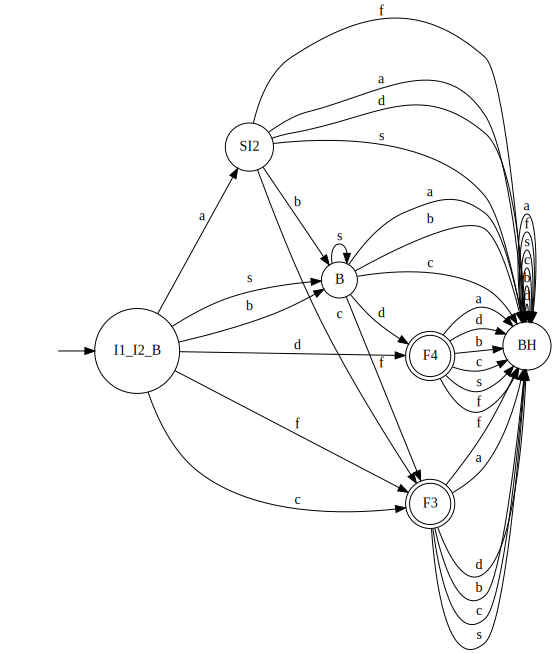

In [14]:
dotObj_dfa_w_bh(tdfa1)

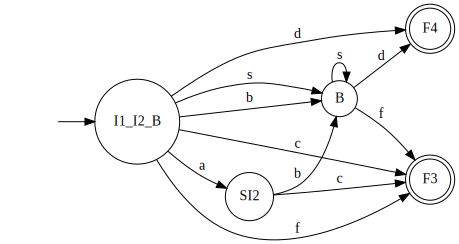

In [15]:
# Just a test to see what would happen.
dotObj_dfa_w_bh(dfa1)

### Was it a good idea to not always show black-holes?

* In what circumstances might you still need to apply the _w_bh view option?
An open-ended answer - anything you may think up can be a valuable piece of feedback.

Answer:

One issue with not showing the black-hole state is that it cannot be confirmed that the DFA is actually a DFA. It could simply be an NFA. In a DFA, every state needs to account for every symbol, so while the non-black-hole display looks tidier, it breaks the rules of a DFA.


## 2.2: Obtain an RE by looking at nfa1

* Follow all paths

* Summarize the paths in your head, using the Star operator suitably




In [16]:
RE1_hand = "(a + '')c + (ab + '' + b)s*(f + d)"

Generating LALR tables


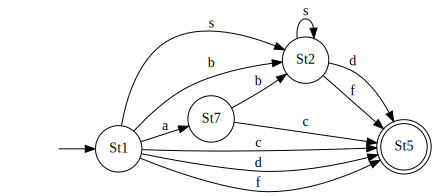

In [17]:
retest = totalize_dfa(min_dfa(nfa2dfa(re2nfa(RE1_hand))))
dotObj_dfa(retest)

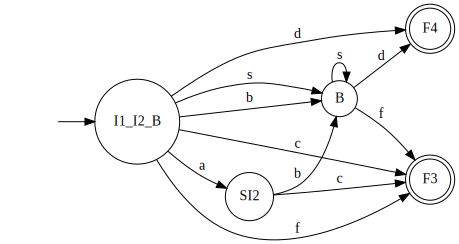

In [18]:
dotObj_dfa(tdfa1)

In [19]:
langeq_dfa(tdfa1, retest)

True

We had a small issue, but then realized we forgot the 'b' transition from I2 to B. This was simply fixed by changing (ab + '') to (ab + '' + b).

## 2.3: Reverse RE1 by hand to obtain Rev_RE1

Once you have an RE, you can "visually reverse it" for simple REs

In [20]:
Rev_RE1_hand = "c(a + '') + (f + d)s*(ba + '' + b)"

Generating LALR tables


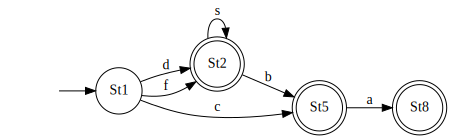

In [21]:
revretest = totalize_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1_hand))))
dotObj_dfa(revretest)

In [22]:
langeq_dfa(revretest, nfa2dfa(rnfa1))

True

## 2.4: Understand del_gnfa_states via help

In [23]:
# help of del_gnfa_states run below
help(del_gnfa_states)

Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



### Document what you learned from the function help of del_gnfa_states and summarize below


* It seems that del_gnfa_states will remove the states from the given GNFA and convert it to a regular expression.

* The order of state deletion is either picked internally or specified by the DelList variable, where the order of the given states will denote the order in which they are removed.

* It also gives a visualization of the deletion process through the use of the returned dotObj_List variable.

# Problem 3: Converting to GNFA and Attempting Two Elimination Orders

Work on rnfa1 to obtain Rev_RE1 and Rev_RE2 

## 3.1: Obtain grnfa1 below via a suitable command

In [24]:
grnfa1 = mk_gnfa(rnfa1)

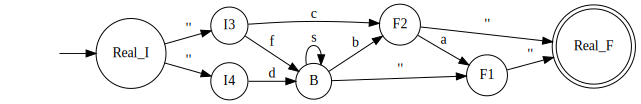

In [25]:
dotObj_gnfa(grnfa1)

## 3.2: Apply the elimination order by supplying the second argument 
['B', 'F2', 'F1', 'I3', 'I4']

as you learned in the help

In [26]:
(Gfinal, DO, Rev_RE1) = del_gnfa_states(grnfa1, ['B', 'F2', 'F1', 'I3', 'I4'])

**** Eliminating state B ****
**** Eliminating state F2 ****
**** Eliminating state F1 ****
**** Eliminating state I3 ****
**** Eliminating state I4 ****


In [27]:
Rev_RE1

'((((((((d ((s)* b)) a) + (d (s)*)) + (d (s)*)) + (d ((s)* b))) + (d ((s)* b))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c)))'

Generating LALR tables


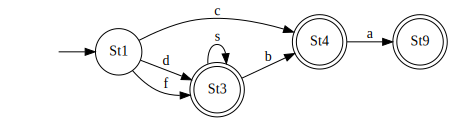

In [29]:
rev_re1DFA = min_dfa(nfa2dfa(re2nfa(Rev_RE1)))
dotObj_dfa(rev_re1DFA)

In [30]:
langeq_dfa(revretest, rev_re1DFA)

True

In [31]:
iso_dfa(rev_re1DFA, revretest)

True

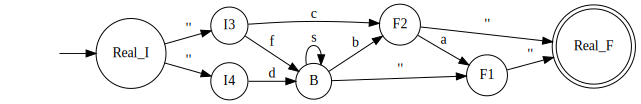

In [34]:
DO[0]

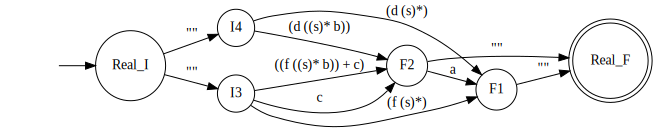

In [35]:
DO[1]

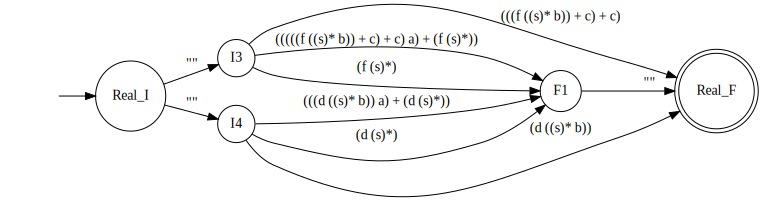

In [36]:
DO[2]

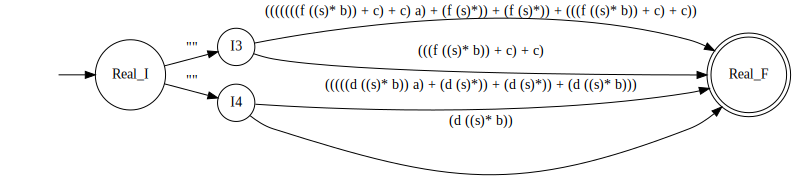

In [37]:
DO[3]

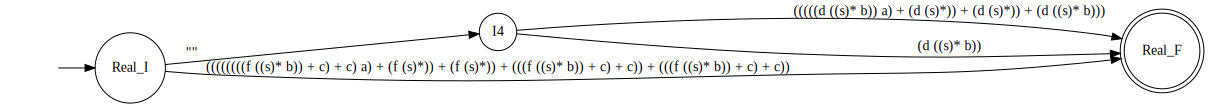

In [38]:
DO[4]

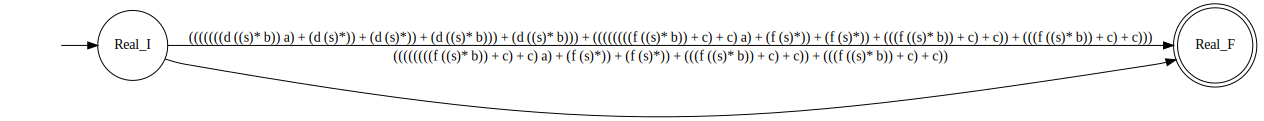

In [39]:
DO[5]

## Examine DO[0] through DO[Last_Legal_Item] (find out how long DO is)

DO[0] is the initial GNFA machine, DO[1] is the next one, and so on. You will see each step getting
rid of one state.

### Summarize your observation of the state elimination and which REs were introduced as a result. Use one bullet per question answered below.

* Initially, we looked at the difference between DO[0] and DO[1]. In DO[1], the state B is removed and the possible paths that went through B are converted to regular expressions with a start point at the state entering B and an endpoint at the state entered from B. These new state transitions are I4 -> F1, I4 -> F2, I3 -> F2, another I3 -> F2, and I3 -> F1.

* In our observation of DO[1], we noted that the first I3 -> F2 transition 'c', seemed redundant as a single 'c' character could be achieved in the second I3 -> F2 transition ((f((s)*b)) + c).

* Observing DO[1] compared to DO[2], we again noticed that some of the state transitions seemed redundant. In DO[2], F2 is removed leaving two I4 -> F1 transitions, two I3 -> F1 transitions, a transition from I4 -> Real_F, and a final regular expression transition from I3 -> Real_F. However, the two I4 -> F1 transitions seem unnecessary, as one has an OR clause that accounts for the second. The same occurs with the two I3 -> F1 transitions.

* Another note with DO[2] was that the Real_F transitions coming from I4 and I3 also seemed like they could be easily combined with the other I4/I3 -> F1 transitions using an (a + '') in place of the 'a' in the (((((f ((s)\* b)) + c) + c) a) + (f (s)\*)) and (((d ((s)\* b)) a) + (d (s)\*)) transitions. Overall, it seems that the del_gnfa_states function passes over a lot of simplification opportunities.

* Looking at the difference between DO[2] and DO[3], it seems that the duplicate transitions are getting much worse. There are two I3 -> Real_F and two I4 -> Real_F transitions when there should only be one of each. There are also duplicates within the duplicates. In the longer I3 -> Real_F transition, there is the statement fs\* + fs\*. In the other I3 -> Real_F transition there is c + c. A similar duplication issue also exists with the I4 -> Real_F transitions.

* Comparing DO[3] to DO[4] shows a continuation of the duplication issue, with the same issues in the Real_I -> Real_F and new I4 -> Real_F that were in the DO[3] regular expression transitions. What is worse is the compiling of the issues. The duplication in DO[3]'s transitions was not resolved when the transitions were combined, leading to duplications within duplications and nearly illegible regular expression transitions.

* DO[5] shows the nearly complete regular expression with two transitions that need to be fused. However, due to the duplication issues, the two transitions are essentially already fused. The bottom transition ((((((((f ((s)\* b)) + c) + c) a) + (f (s)\*)) + (f (s)\*)) + (((f ((s)\* b)) + c) + c)) + (((f ((s)\* b)) + c) + c)) is already in the last half of the top transition by the use of the OR operator. Overall, while the del_gnfa_states is able to give a viable regular expression, it is far too verbose to be useful, at least given the assigned state removal order.

## 3.3: Apply the elimination order by supplying the second argument 
 ['I3', 'I4', 'F1', 'B', 'F2' ]

as you learned in the help

In [51]:
(Gfinal, DO, Rev_RE2) = del_gnfa_states(grnfa1, ['I3', 'I4', 'F1', 'B', 'F2' ])

**** Eliminating state I3 ****
**** Eliminating state I4 ****
**** Eliminating state F1 ****
**** Eliminating state B ****
**** Eliminating state F2 ****


In [52]:
Rev_RE2

'((((((((d + f) + f) ((s)* b)) + c) + c) ((a + "") + "")) + (((d + f) + f) (s)*)) + (((d + f) + f) (s)*))'

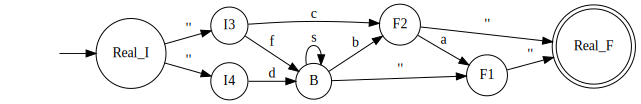

In [55]:
DO[0]

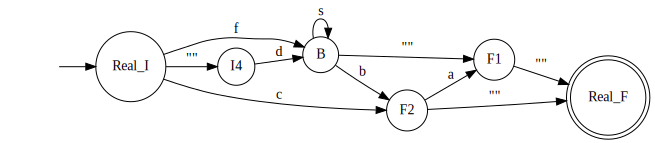

In [56]:
DO[1]

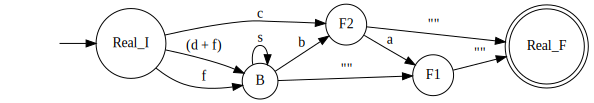

In [57]:
DO[2]

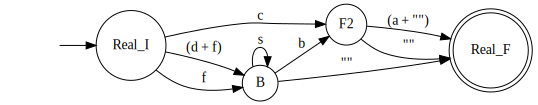

In [58]:
DO[3]

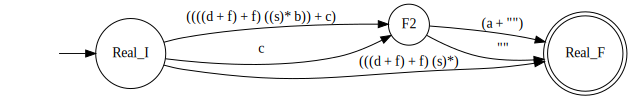

In [59]:
DO[4]

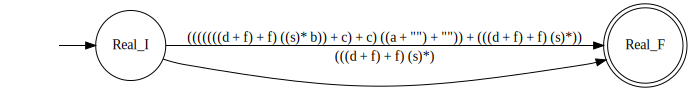

In [60]:
DO[5]

## Examine DO[0] through DO[Last_Legal_Item] (find out how long DO is)

### Summarize your observation of the state elimination and which REs were introduced as a result

* Looking at the difference between DO[0] and DO[1], it seems much simpler than the previous dot-object list. The only difference between DO[0] and DO[1] now is that the I3 -> F2 and I3 -> B transitions were replaced by equivalent Real_I -> F2 and B transitions.

* After analyzing DO[1] and DO[2], it is clear that his state deletion order will yield a much better regular expression than the previous one. The only major difference is that in place of I4, there is now a (d + f) transition from Real_I to B. Though, there is still a duplication issue, as an unnecessary 'f' transition exists between Real_I and B.

* The difference between DO[2] and DO[3] is once again much cleaner than in the previous dot-object list. The only difference is an (a + '') transition from F2 to Real_F and direct epsilon transitions from B and F2 to Real_F. Though, the epsilon transition from F2 to Real_F seems redundant given the (a + '') transition.

* DO[4] is still much simpler than the previous version, though there are some duplication issues starting to occur. Most notably the Real_I -> F2 'c' transition that is accounted for in the other Real_I -> F2 transition. The Real_I -> Real_F transition also seems redundant given the longer Real_I -> F2 one.

* DO[5] gives a much cleaner regular expression than the previous version, but it still suffers from the duplication issue.

* The duplication seems mainly due to the number of paths that had to be accounted for and the fact that each state removal occurred in a black-box. The del_gnfa_states function seems to account for the direct paths which are created by a state removal but is incapable of recognizing when paths should be merged. It also does not recognize when two transitions will ultimately end in the same state. This is shown in the Real_I -> Real_F transition in DO[4] which could be combined with the longer Real_I -> F2 transition.

## 3.4: Check for isomorphism as requested between Rev_RE1 and Rev_RE2

Apply a Jove call that is compact (and will be given in class) that checks that Rev_RE1 and Rev_RE2 are equivalent. It has to involve iso_dfa and min_dfa and other calls.

In [62]:
iso_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1))), min_dfa(nfa2dfa(re2nfa(Rev_RE2))))

Generating LALR tables
Generating LALR tables


True

In [66]:
# Just look at it again for comparison

Rev_RE1_hand

"c(a + '') + (f + d)s*(ba + '' + b)"

## 3.5: Check for isomorphism as requested between Rev_RE1 and Rev_RE1_hand

Same methods as above.

In [65]:
iso_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1_hand))), min_dfa(nfa2dfa(re2nfa(Rev_RE1))))

Generating LALR tables
Generating LALR tables


True

# Problem 4: Chasing down the RE2NFA components

Find out where the s* components are and explain the set of all strings that precede s* in Rev_RE2 and the NFA of Rev_RE2

Find out where the ending "a" is, and find out the set of all the symbols that precede a

Let's first look at the NFA and then see where the RE "parts" are in it.

Generating LALR tables


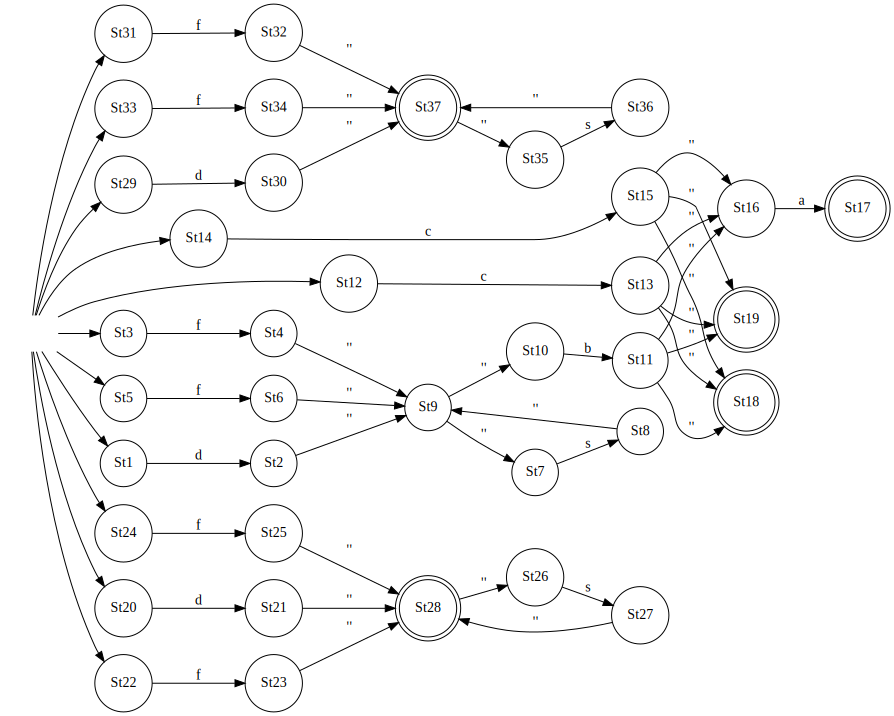

In [67]:
dotObj_nfa(re2nfa(Rev_RE2))

In [68]:
Rev_RE2

'((((((((d + f) + f) ((s)* b)) + c) + c) ((a + "") + "")) + (((d + f) + f) (s)*)) + (((d + f) + f) (s)*))'


This is an exercise in explaining how Rev_RE2 got translated to an NFA. You are to pick these cases and find an example of each, and explain below. What you pick does not matter.

* Find a case where a Star is used, and explain the construction, pointing to the states involved. Use up to 6 bullets below. More or less based on how you explain (clarity not length emphasized).
  - One case where a star is used is in the states St28, St26, and St27.
  - This star case creates two extra states (St26 and St27).
  - An epsilon transition from St28 to St26 allows St26 to always be active whenever the current state is St28. An epsilon transition from St27 to St28 provides similar functionality.
  - An 's' transition from St26 to St27 allows for more 's's to be added to the string.
  - An odd attribute of this NFA is that there are not multiple transitions to or from any state. The s* could have easily been achieved with an 's' transition from St26 back to St28, or just an 's' transition from St28 back to itself.

* Find a case where the Star follows something (I.e. a concatenation of the form "X" followed by "Star" is used). Show how that concatenation construction is accomplished in the same manner (up to 6 bullets roughly) as above. More or less based on how you explain.
  - One case where there is an "X" followed by a "Star" is with states St24--St25, St20--St21, and St22--St23 which connect to state St28 and through it the "Star" operator states St26 and St27.
  - It appears that states St20 through St25 form a sub-NFA where the only transitions are two 'f' transitions (one from St24 to St25 and another from St22 to St23) and one 'd' transition (from St20 to St21).
  - The "final states" of this sub-NFA (St25, St23, and St21) are then connected to the initial state of the Star-sub-NFA with epsilon transitions.
  
* Find a case where something follows Star (I.e. a concatenation of the form "Star" followed by "X"). Explain how the concatenation is accomplished.
  - One case where there is a "Star" followed by an "X" is with the states St10 and St11 which are preceded by the Star-sub-NFA using St9, St8, and St7.
  - In this case, the Star-sub-NFA is identical to the Star defined previously with St9 taking the place of St28, St7 taking the place of St26, and St8 taking the place of St27.
  - For this Star-sub-NFA, St9 would be the only initial and only final state.
  - To concatenate it onto the NFA St10--St11, we would add an epsilon transition from St9 to St10 and remove St9's final status.

## Repeat finding out the aforesaid paths in your own Rev_RE1_hand

Generating LALR tables


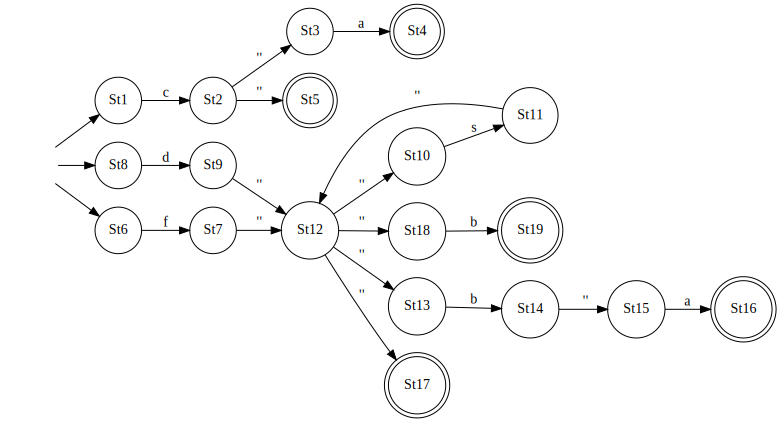

In [69]:
dotObj_nfa(re2nfa(Rev_RE1_hand))


This is an exercise in explaining how Rev_RE1_hand got translated to an NFA. You are to pick these cases and find an example of each, and explain below. What you pick does not matter.

* Find a case where a Star is used, and explain the construction, pointing to the states involved. Use up to 6 bullets below. More or less based on how you explain (clarity not length emphasized).
  - The only case where Star is used is with the states St12, St11, and St10.
  - The format of Star is identical to the Star cases for Rev_RE2. In this case, St12 takes the place of Rev_RE2-St28, St11 takes the place of Rev_RE2-St27, and St10 takes the place of Rev_RE2-St26.

* Find a case where the Star follows something (I.e. a concatenation of the form "X" followed by "Star" is used). If such a case does not arise in your RE, skip this part. Show how that concatenation construction is accomplished in the same manner (up to 6 bullets roughly) as above. More or less based on how you explain. 
  - The only case where Star follows something is when the sub-NFA comprised by St6, St7, St8, and St9 is concatenated onto the Star-sub-NFA.
  - In the sub-NFA there are two transitions, a 'd' transition (St8 to St9) and an 'f' transition (St6 to St7).
  - In this case, St9 and St7 will be the final states for the sub-NFA.
  - To concatenate onto the Star-sub-NFA, St9 and St7 will gain epsilon transitions to St12 and then lose their final state status.
  
* Find a case where something follows Star (I.e. a concatenation of the form "Star" followed by "X"). If such a case does not arise in your RE, skip this part. Explain how the concatenation is accomplished.
  - The only case where something follows Star is when the Star-sub-NFA is concatenated onto the sub-NFA comprised of St18, St19, St13, St14, and St17.
  - In this case, we would take the final state St12 from the Star-sub-NFA and concatenate it with epsilon transitions onto the initial states of the sub-NFA (St18, St13, and St17).

# END
